In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
print("NOTEBOOK 04: FEATURE ENGINEERING")

NOTEBOOK 04: FEATURE ENGINEERING


In [3]:
df=pd.read_csv("../data/processed/crop_data_cleaned.csv")

In [4]:
print("\n Data Loaded Successfully!")
print(f"Shape:{df.shape}")
print(f"\n Original Features: {list(df.columns)}")
print("\nFirst 5 Rows")
print(df.head())


 Data Loaded Successfully!
Shape:(2200, 8)

 Original Features: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

First 5 Rows
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [5]:
original_features=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
target = 'label'

print(f"\n Original Features: {len(original_features)}")
print(f"Target: {target}")


 Original Features: 7
Target: label


# Feature Engineering Strategy

In [6]:
print("FEATURE ENGINEERING STRATEGY")

FEATURE ENGINEERING STRATEGY


In [7]:
engineering_plan = """
 FEATURE ENGINEERING PLAN:

1. NUTRIENT RATIOS (NPK Interactions)
   • N_to_P_ratio: Nitrogen to Phosphorus ratio
   • N_to_K_ratio: Nitrogen to Potassium ratio
   • P_to_K_ratio: Phosphorus to Potassium ratio
   • NPK_sum: Total nutrient content
   • NPK_product: Multiplicative interaction

2. CLIMATE FEATURES
   • temp_humidity_interaction: Temperature × Humidity
   • climate_index: Combined climate factor
   • temp_range_category: Temperature zones (Cool/Moderate/Hot)
   • humidity_category: Humidity levels (Low/Medium/High)

3. SOIL FEATURES
   • ph_category: pH classification (Acidic/Neutral/Alkaline)
   • ph_squared: Non-linear pH effects
   • nutrient_ph_interaction: NPK × pH interactions

4. WATER FEATURES
   • rainfall_category: Rainfall zones (Low/Medium/High)
   • water_stress_index: Temperature/Rainfall ratio
   • moisture_index: Rainfall × Humidity

5. COMPOSITE INDICES
   • growing_condition_index: Overall suitability score
   • resource_availability: Combined N+P+K+Rainfall
   • environmental_stress: Temperature + low humidity

Total New Features:20
Total Features After Engineering:27
"""

print(engineering_plan)


 FEATURE ENGINEERING PLAN:

1. NUTRIENT RATIOS (NPK Interactions)
   • N_to_P_ratio: Nitrogen to Phosphorus ratio
   • N_to_K_ratio: Nitrogen to Potassium ratio
   • P_to_K_ratio: Phosphorus to Potassium ratio
   • NPK_sum: Total nutrient content
   • NPK_product: Multiplicative interaction

2. CLIMATE FEATURES
   • temp_humidity_interaction: Temperature × Humidity
   • climate_index: Combined climate factor
   • temp_range_category: Temperature zones (Cool/Moderate/Hot)
   • humidity_category: Humidity levels (Low/Medium/High)

3. SOIL FEATURES
   • ph_category: pH classification (Acidic/Neutral/Alkaline)
   • ph_squared: Non-linear pH effects
   • nutrient_ph_interaction: NPK × pH interactions

4. WATER FEATURES
   • rainfall_category: Rainfall zones (Low/Medium/High)
   • water_stress_index: Temperature/Rainfall ratio
   • moisture_index: Rainfall × Humidity

5. COMPOSITE INDICES
   • growing_condition_index: Overall suitability score
   • resource_availability: Combined N+P+K+Rain

# Create NPK Ratio Features

In [8]:
print("FEATURE ENGINEERING 1: NPK RATIOS")

FEATURE ENGINEERING 1: NPK RATIOS


In [9]:
df_fe=df.copy()

In [10]:
#NPK ratios (handle division by zero)
df_fe["N_to_P_ratio"]=df_fe["N"]/(df_fe["P"]+1e-5) #Add small constant to avoid division by zero
df_fe["N_to_K_ratio"]=df_fe["N"]/(df_fe["K"]+1e-5)
df_fe["P_to_K_ratio"]=df_fe["P"]/(df_fe["K"]+1e-5)

df_fe["NPK_sum"]=df_fe["N"]+df_fe["P"]+df_fe["K"]
df_fe["NPK_product"]=df_fe["N"]*df_fe["P"]*df_fe["K"]

df_fe["N_dominance"]=df_fe["N"]/(df_fe["NPK_sum"]+1e-5)
df_fe["P_dominance"]=df_fe["P"]/(df_fe["NPK_sum"]+1e-5)
df_fe["K_dominance"]=df_fe["K"]/(df_fe["NPK_sum"]+1e-5)

print("\n Created 8 NPK ratio features.")
npk_features=["N_to_P_ratio","N_to_K_ratio","P_to_K_ratio","NPK_sum","NPK_product","N_dominance","P_dominance","K_dominance"]
for feat in npk_features:
    print(f"  {feat}: Range [{df_fe[feat].min():.2f}, {df_fe[feat].max():.2f}]")


 Created 8 NPK ratio features.
  N_to_P_ratio: Range [0.00, 23.80]
  N_to_K_ratio: Range [0.00, 9.33]
  P_to_K_ratio: Range [0.09, 6.00]
  NPK_sum: Range [17.00, 385.00]
  NPK_product: Range [0.00, 1149720.00]
  N_dominance: Range [0.00, 0.74]
  P_dominance: Range [0.03, 0.82]
  K_dominance: Range [0.07, 0.88]


In [11]:
df_fe

,N,P,K,temperature,humidity,ph,rainfall,label,N_to_P_ratio,N_to_K_ratio,P_to_K_ratio,NPK_sum,NPK_product,N_dominance,P_dominance,K_dominance
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,2.142857,2.093023,0.976744,175,162540,0.514286,0.240000,0.245714
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1.465517,2.073170,1.414634,184,202130,0.461956,0.315217,0.222826
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1.090909,1.363636,1.250000,159,145200,0.377358,0.345912,0.276730
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,2.114285,1.850000,0.875000,149,103600,0.496644,0.234899,0.268456
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1.857142,1.857142,1.000000,162,137592,0.481481,0.259259,0.259259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,3.147058,3.343749,1.062500,173,116416,0.618497,0.196532,0.184971
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,6.599996,3.666665,0.555555,141,40095,0.702128,0.106383,0.191489
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,3.575756,3.933332,1.100000,181,116820,0.651934,0.182320,0.165746
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,3.656249,3.441175,0.941176,183,127296,0.639344,0.174863,0.185792


#  Create Climate Interaction Features

In [12]:
print("fEATURE ENGINEERING 2: CLIMATE FEATURES")

fEATURE ENGINEERING 2: CLIMATE FEATURES


In [13]:
df_fe["temp_humidity_interaction"]=df_fe["temperature"]*df_fe["humidity"]

In [14]:
df_fe["climate_index"]=(df_fe["temperature"]/50)*(df_fe["humidity"]/100)

In [15]:
def categorize_temperature(temp): # Temperature Categories
    if temp<15:
        return "Cool"
    elif temp<30:
        return "Moderate"   
    else:
        return "Hot"

df_fe["temp_category"]=df_fe["temperature"].apply(categorize_temperature)

In [16]:
def categorize_humidity(hum): # Humidity Categories
    if hum<40:
        return "Low"
    elif hum<70:
        return "Medium"
    else:
        return "High"

df_fe["humidity_category"]=df_fe["humidity"].apply(categorize_humidity)

In [17]:
# Heat Stress Index
df_fe["heat_stress_index"]=df_fe["temperature"]/ (df_fe["humidity"]+1)

In [18]:
print("\n Created 5 climate_based features.")
climate_features=["temp_humidity_interaction","climate_index","temp_category","humidity_category","heat_stress_index"]

for feat in climate_features:
    if df_fe[feat].dtype == "object":
        print(f" {feat}: Categories {df_fe[feat].unique()}")
    else:
        print(f" {feat}: Range [{df_fe[feat].min():.2f}, {df_fe[feat].max():.2f}]")


 Created 5 climate_based features.
 temp_humidity_interaction: Range [247.61, 4073.16]
 climate_index: Range [0.05, 0.81]
 temp_category: Categories ['Moderate' 'Hot' 'Cool']
 humidity_category: Categories ['High' 'Medium' 'Low']
 heat_stress_index: Range [0.11, 1.36]


# Create Soil pH Features

In [19]:
print("FEATURE ENGINEERING 3: SOIL pH FEATURES")

FEATURE ENGINEERING 3: SOIL pH FEATURES


In [20]:
def categorize_ph(ph):
    if ph<5.5:
        return "Acidic"
    elif ph<7.5:
        return "Neutral"
    else:
        return "Alkaline"

df_fe["ph_category"]=df_fe["ph"].apply(categorize_ph)

df_fe["ph_squared"]=df_fe["ph"]**2

df_fe["ph_deviation"]=abs(df_fe["ph"]-7.0)

df_fe["N_ph_interaction"]=df_fe["N"] * df_fe["ph"]
df_fe["P_ph_interaction"]=df_fe["P"] * df_fe["ph"]
df_fe["K_ph_interaction"]=df_fe["K"] * df_fe["ph"]

print("\n Created 6 soil pH based features.")
ph_features=["ph_category","ph_squared","ph_deviation","N_ph_interaction","P_ph_interaction","K_ph_interaction"]

for feat in ph_features:
    if df_fe[feat].dtype == "object":
        print(f" {feat}: Categories {df_fe[feat].unique()}")
    else:
        print(f" {feat}: Range [{df_fe[feat].min():.2f}, {df_fe[feat].max():.2f}]")


 Created 6 soil pH based features.
 ph_category: Categories ['Neutral' 'Alkaline' 'Acidic']
 ph_squared: Range [12.28, 98.71]
 ph_deviation: Range [0.00, 3.50]
 N_ph_interaction: Range [0.00, 1071.29]
 P_ph_interaction: Range [27.76, 940.23]
 K_ph_interaction: Range [32.81, 1325.92]


# Create Rainfall/Water Features

In [21]:
print("FEaTURE ENGINEERING 4: RAINFALL/WATER FEATURES")

FEaTURE ENGINEERING 4: RAINFALL/WATER FEATURES


In [22]:
def categorize_rainfall(rain):
    if rain<50:
        return "Low"
    elif rain<150:
        return "Medium"
    else:
        return "High"

df_fe["rainfall_category"]=df_fe["rainfall"].apply(categorize_rainfall)

# Water Stress Index (high temp, low rainfall)
df_fe["water_stress_index"]=df_fe["temperature"]/(df_fe["rainfall"]+1)

#Moisture Index (rainfall * humidity)
df_fe["moisture_index"]=df_fe["rainfall"] * (df_fe["humidity"]/100)

#Rainfall per degree (water efficiency)
df_fe["rainfall_per_temp"]=df_fe["rainfall"]/(df_fe["temperature"]+1)

#Water Availability Score
df_fe["water_availability"]=(df_fe["rainfall"]/400)*(df_fe["humidity"]/100)

In [23]:
print("\nCreated 5 water-based features:")
water_features = ['rainfall_category', 'water_stress_index', 'moisture_index', 
                  'rainfall_per_temp', 'water_availability']
for feat in water_features:
    if df_fe[feat].dtype == 'object':
        print(f"  • {feat}: Categories = {df_fe[feat].unique()}")
    else:
        print(f"  • {feat}: Range [{df_fe[feat].min():.2f}, {df_fe[feat].max():.2f}]")


Created 5 water-based features:
  • rainfall_category: Categories = ['High' 'Medium' 'Low']
  • water_stress_index: Range [0.07, 1.40]
  • moisture_index: Range [9.39, 253.22]
  • rainfall_per_temp: Range [0.66, 13.55]
  • water_availability: Range [0.02, 0.63]


# Create Composite Index Features

In [24]:
print("FEATURE ENGINEERING 5: COMPOSITE INDICES")

FEATURE ENGINEERING 5: COMPOSITE INDICES


Growing Condition Index (holistic measure)
Normalized: (NPK_avg × rainfall × humidity) / (temp_stress)

In [25]:
df_fe["growing_condition_index"] = (
    (df_fe["N"] + df_fe["P"] +df_fe["K"]/3)*
    (df_fe["rainfall"]/100)*
    (df_fe["humidity"]/100)/
    (abs(df_fe["temperature"]-25)+1)
)

 Resource Availability (total nutrients + water)

In [26]:
df_fe["resource_availability"]=df_fe["NPK_sum"]+df_fe["rainfall"]

Environmental Stress Index

In [27]:
df_fe["environmental_stress"]=(
    (df_fe["temperature"])+((100-df_fe["humidity"])/100)+abs(df_fe["ph"]-7)/4
)

 Nutrient Balance Score (how balanced are NPK ratios)

In [28]:
df_fe["nutrient_balance"]=1/(
    abs(df_fe["N_dominance"]-0.33)+
    abs(df_fe["P_dominance"]-0.33)+
    abs(df_fe["K_dominance"]-0.33+0.01)
)

In [29]:
print("\nCreated 4 composite index features:")
composite_features = ['growing_condition_index', 'resource_availability', 
                      'environmental_stress', 'nutrient_balance']
for feat in composite_features:
    print(f"  • {feat}: Range [{df_fe[feat].min():.2f}, {df_fe[feat].max():.2f}]")


Created 4 composite index features:
  • growing_condition_index: Range [1.02, 289.72]
  • resource_availability: Range [98.14, 503.65]
  • environmental_stress: Range [9.36, 43.84]
  • nutrient_balance: Range [0.91, 50.00]


# Encode Categorical Features

In [30]:
print("ENCODING CATEGORICAL FEATURES")

ENCODING CATEGORICAL FEATURES


In [31]:
categorical_cols=df_fe.select_dtypes(include=["object"]).columns.tolist()
categorical_cols.remove("label")

In [32]:
print(f"\n Categorical features to encode: {categorical_cols}")


 Categorical features to encode: ['temp_category', 'humidity_category', 'ph_category', 'rainfall_category']


In [33]:
df_encoded=pd.get_dummies(df_fe,columns=categorical_cols,prefix=categorical_cols,drop_first=True)

In [34]:
print(f"\n One-Hot Encoding completed!")
print(f"Original shape: {df_fe.shape}")
print(f"Encoded shape: {df_encoded.shape}")
print(f"New columns added: {df_encoded.shape[1]-df_fe.shape[1]}")


 One-Hot Encoding completed!
Original shape: (2200, 36)
Encoded shape: (2200, 40)
New columns added: 4


Show new columns created

In [35]:
new_cols=[col for col in df_encoded.columns if col not in df_fe.columns]
print(f"\n New encoded columns ({len(new_cols)}):")
for col in new_cols:
    print(f" . {col}")


 New encoded columns (8):
 . temp_category_Hot
 . temp_category_Moderate
 . humidity_category_Low
 . humidity_category_Medium
 . ph_category_Alkaline
 . ph_category_Neutral
 . rainfall_category_Low
 . rainfall_category_Medium


# Feature Summary Statistics

In [36]:
print("FEATURE ENGINEERING SUMMARY")

FEATURE ENGINEERING SUMMARY


In [37]:
numerical_cols = df_encoded.select_dtypes(include=[np.number]).columns.tolist()
if 'label' in numerical_cols:
	numerical_cols.remove('label')

In [38]:
print(f"\nFEATURE COUNT:")
print(f"Original Features: {len(original_features)}")
print(f"Engineered Features: {len(numerical_cols) - len(original_features)}")
print(f"Total Features: {len(numerical_cols)}")
print(f"Target Variable: 1 (label)")

print(f"\nFEATURE BREAKDOWN:")
print(f"Original: {len(original_features)}")
print(f" NPK Ratios: 8")
print(f" Climate Features: 5 (+ encoded)")
print(f" pH Features: 6 (+ encoded)")
print(f" Water Features: 5 (+ encoded)")
print(f" Composite Indices: 4")


FEATURE COUNT:
Original Features: 7
Engineered Features: 24
Total Features: 31
Target Variable: 1 (label)

FEATURE BREAKDOWN:
Original: 7
 NPK Ratios: 8
 Climate Features: 5 (+ encoded)
 pH Features: 6 (+ encoded)
 Water Features: 5 (+ encoded)
 Composite Indices: 4


In [39]:
print(f"\nSAMPLE OF ENGINEERED DATA:")
df_encoded.head()


SAMPLE OF ENGINEERED DATA:


,N,P,K,temperature,humidity,ph,rainfall,label,N_to_P_ratio,N_to_K_ratio,...,environmental_stress,nutrient_balance,temp_category_Hot,temp_category_Moderate,humidity_category_Low,humidity_category_Medium,ph_category_Alkaline,ph_category_Neutral,rainfall_category_Low,rainfall_category_Medium
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,2.142857,2.093023,...,21.183970,2.868852,False,True,False,False,False,True,False,False
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1.465517,2.073170,...,21.976789,4.099822,False,True,False,False,False,True,False,False
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1.090909,1.363636,...,23.391303,9.386071,False,True,False,False,True,False,False,False
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,2.114285,1.850000,...,26.694412,3.191945,False,True,False,False,False,True,False,False
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1.857142,1.857142,...,20.471244,3.534031,False,True,False,False,True,False,False,False


# Correlation Analysis of New Features

In [40]:
print("CORRELATION ANALYSIS: NEW FEATURES")

CORRELATION ANALYSIS: NEW FEATURES


In [41]:
key_engineered_features = [
    'N_to_P_ratio', 'N_to_K_ratio','NPK_sum', 'temp_humidity_interaction',
    'climate_index', 'ph_squared','water_stress_index','moisture_index',
    'growing_condition_index','resource_availability','environmental_stress'
]

In [42]:
all_analysis_features=original_features+key_engineered_features
correlation_matrix=df_encoded[all_analysis_features].corr()


Saved: 17_engineered_features_correlation.png


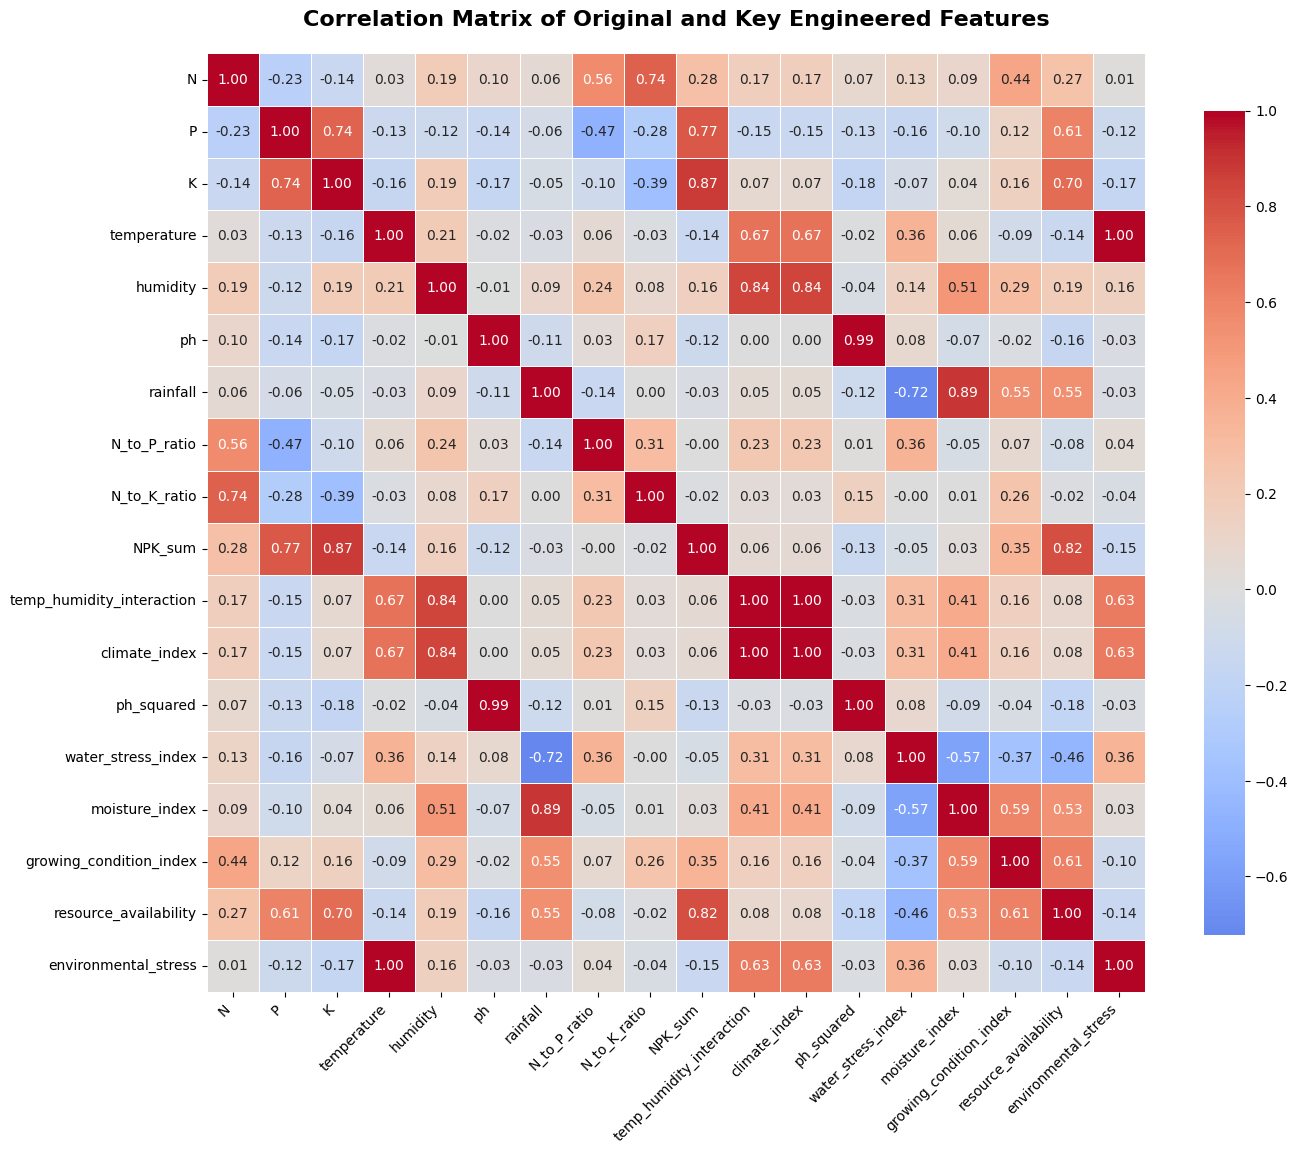

In [43]:
plt.figure(figsize=(14,12))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",center=0,square=True,linewidths=0.5,cbar_kws={"shrink": .8})

plt.title("Correlation Matrix of Original and Key Engineered Features",fontsize=16,fontweight='bold',pad=20)
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.savefig('../data/visualizations/17_engineered_features_correlation.png', dpi=300, bbox_inches='tight')
print("\nSaved: 17_engineered_features_correlation.png")
plt.show()

 Find highly correlated new feature pairs

In [45]:
print("Highly correlated engineered features (|correlation|>0.7):")
high_corr=[]

for i in range(len(key_engineered_features)):
    for j in range(i+1,len(key_engineered_features)):
        feat1=key_engineered_features[i]
        feat2=key_engineered_features[j]
        
        if feat1 in correlation_matrix.columns and feat2 in correlation_matrix.columns:
            corr_val=correlation_matrix.loc[feat1, feat2]
            if abs(corr_val)>0.7:
                high_corr.append((feat1,feat2,corr_val))
                print(f"{feat1:30} {feat2:30} Correlation: {corr_val:6.3f}")

if len(high_corr)==0:
    print(" No highly correlated engineered features found (|correlation|>0.7).")
                

Highly correlated engineered features (|correlation|>0.7):
NPK_sum                        resource_availability          Correlation:  0.818
temp_humidity_interaction      climate_index                  Correlation:  1.000


#  Find highly correlated new feature pairs

In [46]:
print("VISUALIZATION: ENGINEERED FEATURE VARIANCE")

VISUALIZATION: ENGINEERED FEATURE VARIANCE


In [47]:
engineered_only=[col for col in key_engineered_features if col in df_encoded.columns]
feature_variance=df_encoded[engineered_only].var().sort_values(ascending=False)


Saved: 18_engineered_features_variance.png


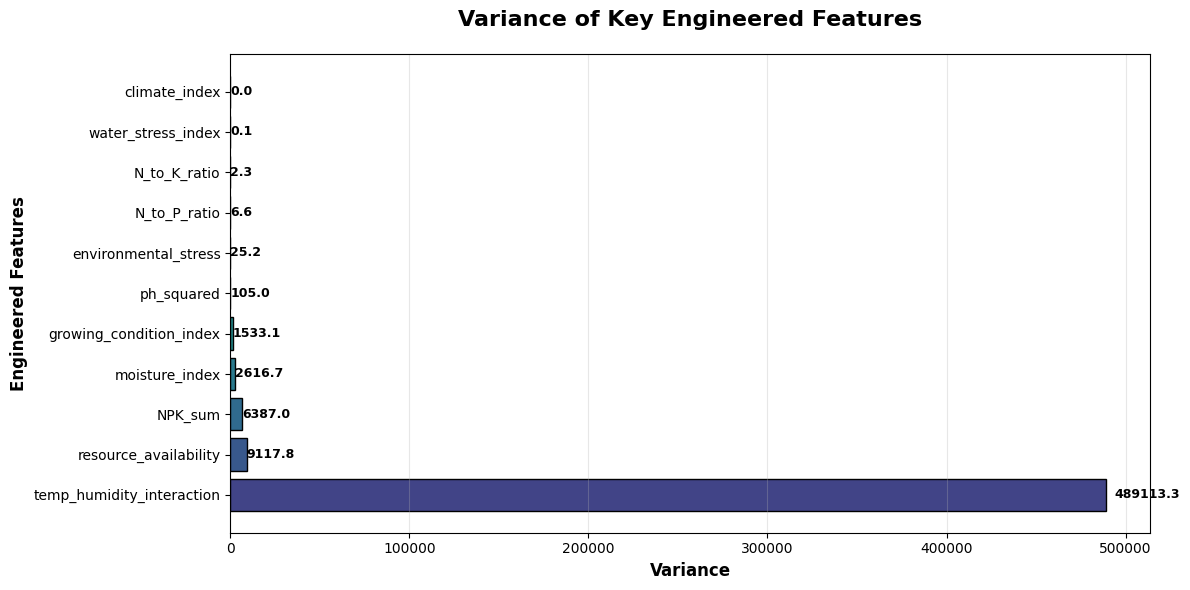

In [48]:
plt.figure(figsize=(12,6))
colors_var=plt.cm.viridis(np.linspace(0.2,0.9,len(feature_variance)))
bars=plt.barh(range(len(feature_variance)),feature_variance.values,color=colors_var,edgecolor="black")

plt.yticks(range(len(feature_variance)),feature_variance.index)
plt.xlabel("Variance",fontweight="bold",fontsize=12)
plt.ylabel("Engineered Features",fontweight="bold",fontsize=12)
plt.title("Variance of Key Engineered Features",fontsize=16,fontweight="bold",pad=20)
plt.grid(axis="x",alpha=0.3)

for i,val in enumerate(feature_variance.values):
    plt.text(val+val*0.01,i,f"{val:.1f}",va="center",fontweight="bold",fontsize=9)

plt.tight_layout()
plt.savefig('../data/visualizations/18_engineered_features_variance.png', dpi=300, bbox_inches='tight')
print("\nSaved: 18_engineered_features_variance.png")
plt.show() 

# Feature Distribution Comparison

In [51]:
print("VISUALIZATION: FEATURE DISTRIBUTION COMPARISON")

VISUALIZATION: FEATURE DISTRIBUTION COMPARISON


Compare original vs engineered features distribution


Saved: 19_engineered_features_distribution.png


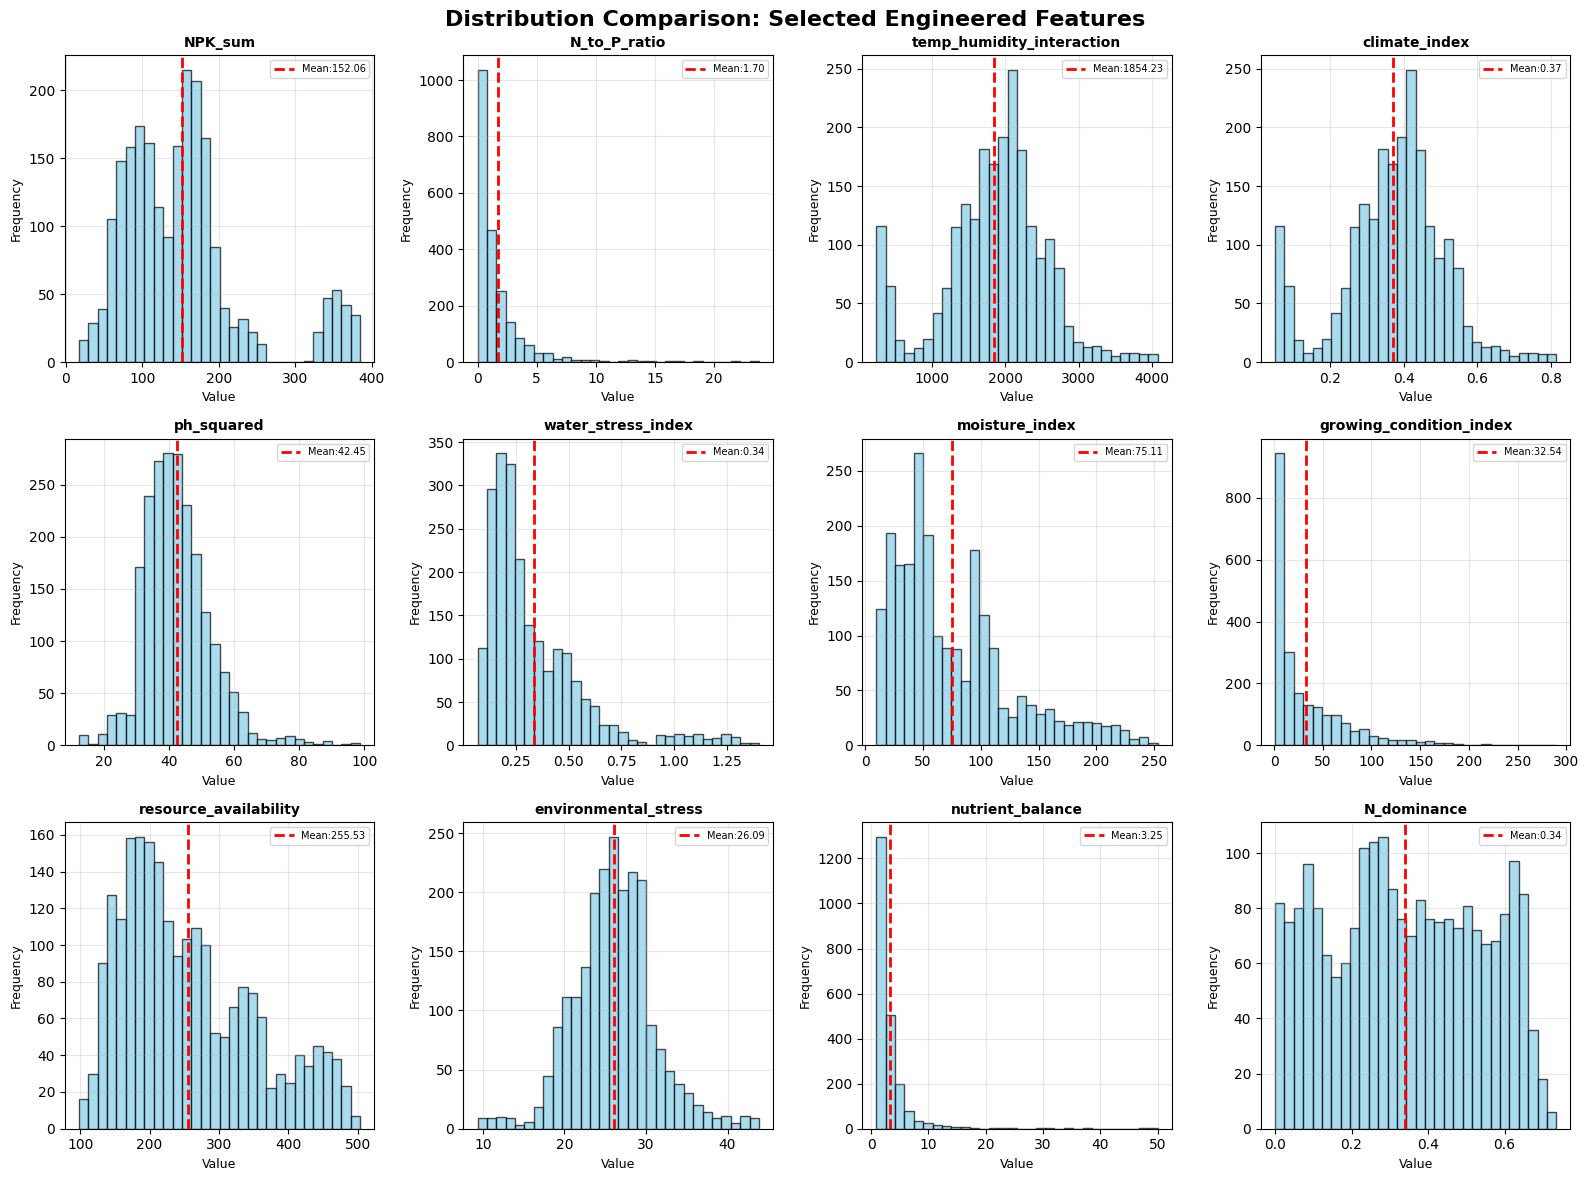

In [52]:
fig,axes=plt.subplots(3,4,figsize=(16,12))
fig.suptitle("Distribution Comparison: Selected Engineered Features",fontsize=16,fontweight="bold")

sample_features = [
    'NPK_sum','N_to_P_ratio', 'temp_humidity_interaction', 'climate_index',
    'ph_squared','water_stress_index','moisture_index', 'growing_condition_index',
    'resource_availability', 'environmental_stress', 'nutrient_balance', 'N_dominance'
]

for idx,feature in enumerate(sample_features):
    row=idx//4
    col=idx%4
    
    if feature in df_encoded.columns:
        axes[row,col].hist(df_encoded[feature],bins=30,color="skyblue",edgecolor="black",alpha=0.7)
        axes[row,col].set_title(f"{feature}",fontweight="bold",fontsize=10)
        axes[row,col].set_xlabel("Value",fontsize=9)
        axes[row,col].set_ylabel("Frequency",fontsize=9)
        axes[row,col].axvline(df_encoded[feature].mean(),color="red",linestyle="--",linewidth=2,label=f"Mean:{df_encoded[feature].mean():.2f}")
        axes[row,col].legend(fontsize=7)
        axes[row,col].grid(True,alpha=0.3)

plt.tight_layout()
plt.savefig('../data/visualizations/19_engineered_features_distribution.png', dpi=300, bbox_inches='tight')
print("\nSaved: 19_engineered_features_distribution.png")
plt.show()

# Save Engineered Dataset

In [53]:
print("SAVING ENGINEERED DATASET")

SAVING ENGINEERED DATASET


In [54]:
output_path = '../data/processed/crop_data_engineered.csv'
df_encoded.to_csv(output_path, index=False)

In [55]:
df_encoded

,N,P,K,temperature,humidity,ph,rainfall,label,N_to_P_ratio,N_to_K_ratio,...,environmental_stress,nutrient_balance,temp_category_Hot,temp_category_Moderate,humidity_category_Low,humidity_category_Medium,ph_category_Alkaline,ph_category_Neutral,rainfall_category_Low,rainfall_category_Medium
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,2.142857,2.093023,...,21.183970,2.868852,False,True,False,False,False,True,False,False
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1.465517,2.073170,...,21.976789,4.099822,False,True,False,False,False,True,False,False
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1.090909,1.363636,...,23.391303,9.386071,False,True,False,False,True,False,False,False
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,2.114285,1.850000,...,26.694412,3.191945,False,True,False,False,False,True,False,False
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1.857142,1.857142,...,20.471244,3.534031,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,3.147058,3.343749,...,27.165488,1.795351,False,True,False,True,False,True,False,False
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,6.599996,3.666665,...,28.079018,1.380729,False,True,False,True,False,True,False,True
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,3.575756,3.933332,...,24.618894,1.602905,False,True,False,True,False,True,False,False
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,3.656249,3.441175,...,26.811446,1.670318,False,True,False,True,False,True,False,True


In [56]:
print(f"\nEngineered dataset saved to: {output_path}")
print(f"Shape: {df_encoded.shape}")
print(f"Features: {df_encoded.shape[1] - 1}")  # Excluding target values prathamesh
print(f"Samples: {df_encoded.shape[0]}")
print(f"Size: {df_encoded.memory_usage(deep=True).sum() / 1024:.2f} KB")


Engineered dataset saved to: ../data/processed/crop_data_engineered.csv
Shape: (2200, 40)
Features: 39
Samples: 2200
Size: 670.73 KB


Save feature names for reference

In [59]:
all_features=[col for col in df_encoded.columns if col != 'label']
feature_list=pd.DataFrame({
    "Feature_Name": all_features,
    "Feature_Type":["Original" if f in original_features else "Engineered" for f in all_features]
})
feature_list.to_csv('../data/processed/feature_list_engineered.csv', index=False)
print("\nFeature list saved to: ../data/processed/feature_list_engineered.csv")


Feature list saved to: ../data/processed/feature_list_engineered.csv


# Feature Engineering Report

In [60]:
print("FEATURE ENGINEERING REPORT")

FEATURE ENGINEERING REPORT


Create comprehensive report

In [61]:
report = {
    'Metric': [
        'Original Features',
        'Engineered Features (Numerical)',
        'Engineered Features (Categorical → Encoded)',
        'Total Features After Engineering',
        'Dataset Rows',
        'Data Completeness',
        'Memory Usage (KB)',
        'Ready for ML'
    ],
    'Value': [
        len(original_features),
        len([f for f in key_engineered_features if f in df_encoded.columns]),
        len([col for col in df_encoded.columns if any(x in col for x in ['_Cool', '_Moderate', '_Hot', '_Low', '_Medium', '_High', '_Acidic', '_Neutral', '_Alkaline'])]),
        df_encoded.shape[1] - 1,  # Excluding target
        df_encoded.shape[0],
        f"{(1 - df_encoded.isnull().sum().sum() / (df_encoded.shape[0] * df_encoded.shape[1])) * 100:.2f}%",
        f"{df_encoded.memory_usage(deep=True).sum() / 1024:.2f}",
        'YES'
    ]
}

In [62]:
report_df=pd.DataFrame(report)
print(report_df.to_string(index=False))

                                     Metric   Value
                          Original Features       7
            Engineered Features (Numerical)      11
Engineered Features (Categorical → Encoded)       8
           Total Features After Engineering      39
                               Dataset Rows    2200
                          Data Completeness 100.00%
                          Memory Usage (KB)  670.73
                               Ready for ML     YES


In [63]:
report_df.to_csv('../data/processed/feature_engineering_report.csv', index=False)
print("\nReport saved to: ../data/processed/feature_engineering_report.csv")


Report saved to: ../data/processed/feature_engineering_report.csv
